# Outbreak Simulator

Written by April Chen

May 2021

## Simulating random variables and exploring relationships between distributions

##### (a) Using the inversion sampling technique, write a method **rand_exp** that takes a rate parameter *λ* as input and produces as output an exponentially distributed random variable with rate parameter *λ*. Use **random.random()** to generate uniform random numbers.

In [2]:
import random
import math 
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt
import statistics

In [3]:
# set seed so that results are consistent 
random.seed(369) 

In [4]:
# function rand_exp that takes input lambda1 and outputs exp. dist. R.V. 
def rand_exp(lambda1):
    # inversion sampling technique for exponential distribution of R.V. 
    u = random.random()
    exp  = - (math.log(1-u))/lambda1
    return exp #returns an exponentially distributed random variable 

##### (b) Devise and run two experiments to demonstrate your **rand_exp** is correct. You can use other implementations

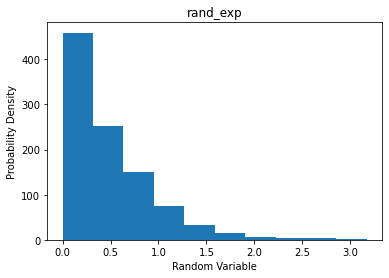

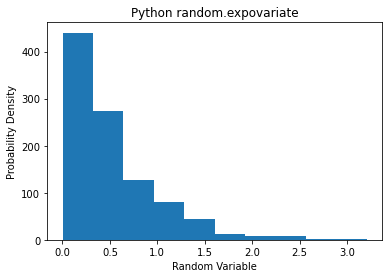

The above graphs should have a similar shape of an inverse exponential relationship.
Expected mean = 0.5 and Obtained mean = 0.5
Expected variance = 0.25 and Obtained variance = 0.25


In [5]:
#This cell contains two experiments to test that rand_exp from part 1(a) is corrrect. 
#I have plotted the general shape of the rand_exp function and Python's in-built expovariate function as a histogram
#and they should produce a similar shape. 
#The second experiment is testing whether or not the mean and variance of rand_exp is what we are supposed to expect.
#Our expected mean is 1/rate and our expected variance is 1/(rate^2)

#DRAW PLOTS 

#INITIALISE VARIABLES
rate = 2.0 #input a rate into our functions
x = [] #This is a list of rand_exp random variables 
y = [] #This is a list of Python's exp function random variables 

for i in range(1000): #loop to generate many random variables
    x += [rand_exp(rate)]
    y += [random.expovariate(rate)]

#PLOTS
#This plots the random variables of rand_exp as a histogram 
plt.hist(x, bins=10)
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.title("rand_exp")
plt.show()

#This plots the random variables of Python's expovariate as a histogram 
plt.hist(y, bins=10)
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.title("Python random.expovariate")
plt.show()

print("The above graphs should have a similar shape of an inverse exponential relationship.")

#EXPERIMENT FOR MEAN AND VARIANCE

#Our expected mean and variance equations
expected_mean = 1.0/rate
expected_variance = 1.0/(rate**2)

#The expected mean and variance from rand_exp function rounded to the nearest 0.25 
obtained_mean = round(statistics.mean(x)*4)/4.0
obtained_variance = round(statistics.variance(x)*4)/4.0

#Prints the results
print("Expected mean =", expected_mean, "and Obtained mean =", obtained_mean)
print("Expected variance =", expected_variance, "and Obtained variance =", obtained_variance)

#This checks if the expected values are equal to obtained values
#If not then it will return an error. 
#Perhaps reload the function if it does return an error due to calculation or rounding errors. 
assert expected_mean == obtained_mean
assert expected_variance == obtained_variance

##### (c) Use **rand_exp** to write a method **rand_poiss** that takes a parameter *λ* as input and produces as output a Poisson distributed random variable with parameter *λ*.

In [12]:
#This function, rand_poiss takes in 1 parameter lambda and returns a poisson distributed random variable.

def rand_poiss(lambda1):
    t = rand_exp(lambda1) 
    T = 1
    eventCount = 0
    while(t < T):  
        eventCount = eventCount +1   
        t = t + rand_exp(lambda1)
    return eventCount

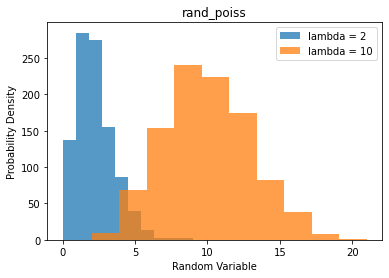

From the figure above, the general shape of each lambda is a poisson distribution.


In [13]:
#This is a plot to show the results of rand_poiss for 2 different values of lambda. 

x = []
y = []

for i in range(1000):
    x += [rand_poiss(2)]
    y += [rand_poiss(10)]
    
plt.title("rand_poiss")
plt.hist(x, bins=10, alpha = 0.75)
plt.hist(y, bins=10, alpha = 0.75)
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.legend(["lambda = 2", "lambda = 10"])
plt.show()

print("From the figure above, the general shape of each lambda is a poisson distribution.")

##### (d) Use **rand_exp** to write a method **rand_gamma** that takes an integer parameter *k* and rate parameter *θ* as input and produces as output a gamma distributed random variable with parameters *k* and *θ*.

In [16]:
#rand_gamma is the sum of k exponentially distributed random variables. 

def rand_gamma(k,theta):
    total = 0
    for i in range(k):
        total += rand_exp(1.0/theta)
    return total

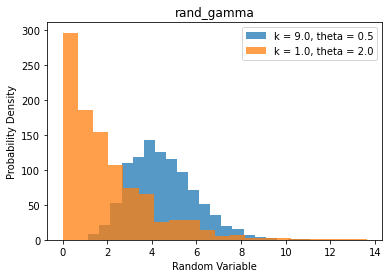

From the figure above, the general shape of each plot is a gamma distribution.


In [17]:
#This cell plots rand_gamma for two different values of k and theta. 

x = []
y = []

for i in range(1000):
    x += [rand_gamma(9, 0.5)]
    y += [rand_gamma(1, 2.0)]
    
plt.title("rand_gamma")
plt.hist(x, bins=20, alpha = 0.75)
plt.hist(y, bins=20, alpha = 0.75)
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.legend(["k = 9.0, theta = 0.5", "k = 1.0, theta = 2.0"])
plt.show()

print("From the figure above, the general shape of each plot is a gamma distribution.")

##### (e) Explain why your **rand_gamma** method lacks the generality you would typically want for simulating gamma distributed random variables.

rand_gamma lacks the generality because it doesn't give the exact value, only an approximation of the gamma distribution, in other words, the rand_gamma function is not a closed form (exact formula).

## Simulating outbreaks 

A standard model in epidemiology is the SIR model of infectious disease spread. It has a population of *N* hosts being divided into 3 *compartments*, so is known as a compartmental model:

• the *S* compartment of those who are susceptible to the disease

• the *I* compartment of those who are infectious with the disease

• the *R* compartment of those who are recovered from the disease and now im- mune (or, more generally, those who are removed from the epidemic through recovery with immunity, or isolation, or death, etc).

We assume that *S + I + R = N*.

The model can be deterministic or stochastic. We consider the stochastic version here. Times between all events are exponentially distributed with the following rates which depend on the current state of the outbreak, assumed to be (*S,I,R*):

• the rate of transmissions is *βSI/N* and the new state is (*S − 1, I + 1, R*), and

• the rate of recoveries is *γI* and the new state is (*S,I −1,R+1*).

You can use any functions from the **random** module that you like for this question.

Probably the only one you need is **random.expovariate**.

##### (a) At what point will the epidemic finish?

The epidemic will finish when I = 0, the number of infected reaches zero. 

(b) Write method **sim_SIR** that takes as inputs *N, I<sub>0</sub>, β, γ* and produces as output a list of the event times and the number susceptible, infected and recovered at each time point. All outbreaks start at time *t* = 0 with *S<sub>0</sub> = N − I<sub>0</sub>*.

In [18]:
#Function sim_SIR simulates the SIR Model of an infectious disease spread. 

def sim_SIR(N,I0, beta, gamma):
    #INITIALISE VARIABLES
    
    #time variables. 
    t = 0 #total time that has elapsed 
    t1 = 0 #Time of Expovariate with parameter rate of transmission
    t2 = 0 #Time of Expovariate with parameter rate of recoveries
    t3 = 0 #lowest value of t1 or t2 
    
    #the current S, I, R variables 
    Sn = N - I0
    In = I0
    Rn = 0
    
    #list of t, S, I, R to output for plot
    t_list = [t]
    S_list = [Sn]
    I_list = [In]
    R_list = [Rn]
    
    while In > 0: #while a person is still infected
        rate_of_transmission = (beta * Sn * In) / N #rate if the person transmits the infection
        rate_of_recovery = gamma * In #rate if the person recovers from the infection
        
        t1 = random.expovariate(rate_of_transmission) #Exponentially distributed R.V. with rate of transmission
        t2 = random.expovariate(rate_of_recovery) #Exponentially distributed R.V. with rate of recovery
        t3 = min(t1, t2) #finds out which of the two events (t1, t2) happens first 
        
        t += t3 #add the event that happens to total time 
        t_list += [t] #add the event time to the times list 
        
        if t3 == t1: #if transmission happens first, the new state is (S − 1, I + 1, R)
            Sn -= 1
            In += 1
            
        if t3 == t2: #if recovery happens first, the new state is (S, I − 1, R + 1)
            In -= 1
            Rn += 1
            
        #Add current values of S,I,R, into a list
        S_list += [Sn]
        I_list += [In]
        R_list += [Rn]
        
    return t_list, S_list, I_list, R_list #output the times, S,I,R list 

##### (c) Run a simulation with *N* = 1000, *I<sub>0</sub>* = 10, *β* = 3, *γ* = 2 and plot the number infected through time.

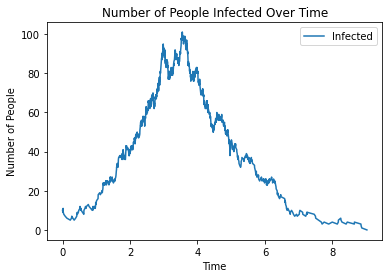

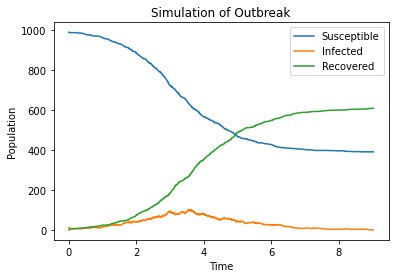

In [21]:
#This cell simulates sim_SIR(1000,10,3,2) and plots it over time

t_list, S_list, I_list, R_list = sim_SIR(1000,10,3,2)

#plots number of infected through time
plt.title("Number of People Infected Over Time")
plt.plot(t_list, I_list)
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.legend(["Infected"])
plt.show()

#plots simulation of outbreak
plt.title("Simulation of Outbreak")
plt.plot(t_list, S_list)
plt.plot(t_list, I_list)
plt.plot(t_list, R_list)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.show()

##### (d) Run an experiment and report the results to approximate the probability that a large outbreak occurs using the same parameters as above but with only one initial infected. What has usually happened if there is no large outbreak?

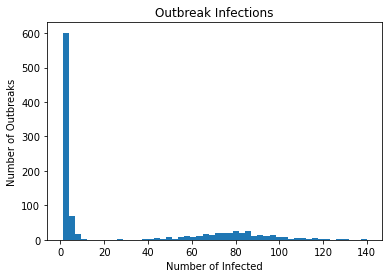

Probability of large outbreaks: 0.31


In [22]:
#This cell runs an experiment of sim_SIR starting with 1 infected person. 

Is = []
large_outbreak = 0

#SIMULATE OUTBREAK 1000 times
for i in range(1000): #we run the simulation for a large number of times (1000)
    t_list, S_list, I_list, R_list = sim_SIR(1000,1,3,2)
    number_of_infections = max(I_list) #counts the number of people who get infected in each simulation
    Is += [number_of_infections] #we put this number into a list 
    if number_of_infections > 20: #Threshold = 20.  (> 0.02 of population infected)
        large_outbreak += 1 #If more than 20 people get infected, it is a large outbreak (not a small outbreak). 

#PLOTS THE NUMBER OF OUTBREAK INFECTIONS
plt.title("Outbreak Infections")
plt.xlabel("Number of Infected")
plt.ylabel("Number of Outbreaks")
plt.hist(Is, bins=50)
plt.show()

#Prints the probability of a large outbreak happens
print("Probability of large outbreaks:", large_outbreak/1000)

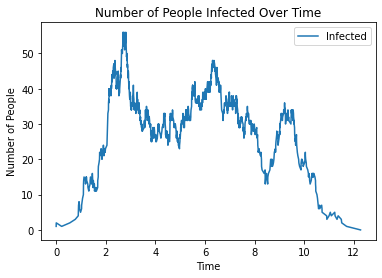

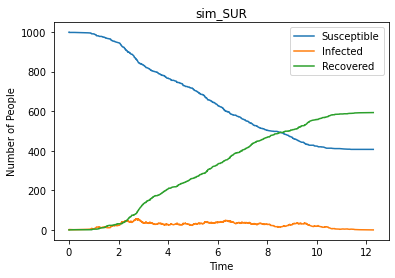

In [29]:
#Plots that generates an outbreak to study the results of sim_SIR with 1 person initially infected.  
#Run this cell multiple times to generate different results. 

t_list, S_list, I_list, R_list = sim_SIR(1000,1,3,2)

#plots number of infected through time
plt.title("Number of People Infected Over Time")
plt.plot(t_list, I_list)
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.legend(["Infected"])
plt.show()

#plots simulation of outbreak
plt.title("sim_SIR")
plt.plot(t_list, S_list)
plt.plot(t_list, I_list)
plt.plot(t_list, R_list)
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.legend(["Susceptible", "Infected", "Recovered"])
#plt.legend(["Infected"])
plt.show()

From observations of the graphs above, approximately 1/3 of the time a large outbreak occurs. I have defined the threshold of a large outbreak when more than 20 of the 1000 people get infected. From the Outbreak Infections graph, we can see that most outbreaks are small (less than 20 people get infected). 

If there are no large outbreaks, the infected person either recovers and doesn't infect anyone else, or the infected person infects a small number of people and they all recover, or the infected person infects 1 person but then recovers and the newly infected person infects another person but they all eventually recover. 

##### (e) The reproduction number *R<sub>0</sub> = β/γ* of the epidemic is the mean number of transmissions by a single infected in an otherwise susceptible population. Using the same parameters as in part (c) but allowing *β* to vary, select five values of *R<sub>0</sub>* above and below 1 to explore whether or not you get an outbreak. Report and explain your results.

In [30]:
#R0 = beta/gamma #this is the mean number of transmissions by a single infected person. 

betas = [0.5, 1.8, 3, 6, 9] #the values of betas, which give R0 values varying from below and above 1

#Runs the simulation for each beta value 
for beta in betas: 
    large_outbreak = 0

    for i in range(1000):
        t_list, S_list, I_list, R_list = sim_SIR(1000,1,beta,2)
        number_of_infections = max(I_list)
        if number_of_infections > 20:
            large_outbreak += 1

    #This prints out the probability of outbreak with varying R0 values
    print("R0: ", beta/2, "Probability of large outbreaks:", large_outbreak/1000)
    

R0:  0.25 Probability of large outbreaks: 0.0
R0:  0.9 Probability of large outbreaks: 0.01
R0:  1.5 Probability of large outbreaks: 0.348
R0:  3.0 Probability of large outbreaks: 0.692
R0:  4.5 Probability of large outbreaks: 0.769


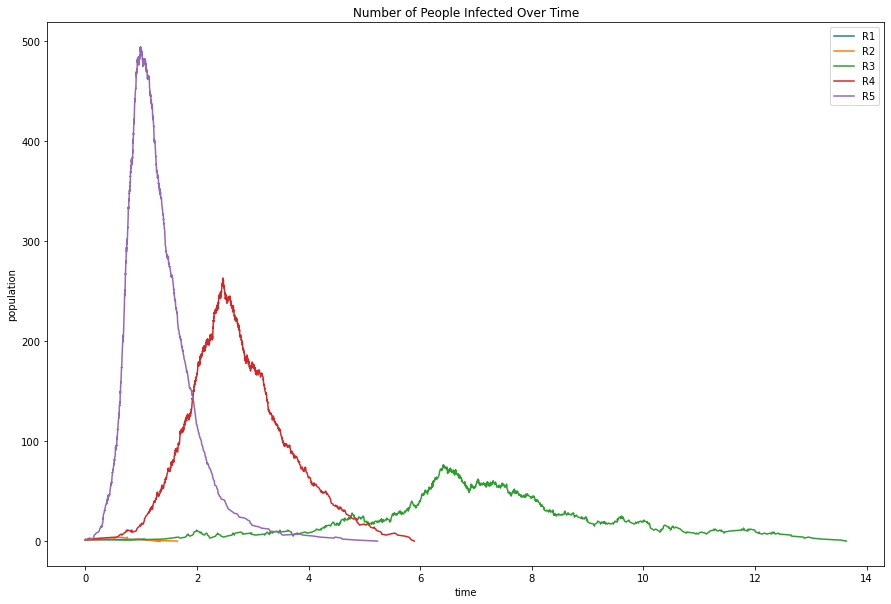

In [63]:
#This is an experiment that runs five different R0 values and plots the results on a graph
#Run this cell multiple times to generate different results. 

#simulates outbreak for 5 different beta values 
R1 = sim_SIR(1000,1,0.5,2)
R2 = sim_SIR(1000,1,1.8,2)
R3 = sim_SIR(1000,1,3,2)
R4 = sim_SIR(1000,1,5,2)
R5 = sim_SIR(1000,1,10,2)

#plots number of infected through time
plt.figure(figsize=(15, 10))
plt.title("Number of People Infected Over Time")
plt.plot(R1[0], R1[2])
plt.plot(R2[0], R2[2])
plt.plot(R3[0], R3[2])
plt.plot(R4[0], R4[2])
plt.plot(R5[0], R5[2])
plt.xlabel("time")
plt.ylabel("population")
plt.legend(["R1","R2","R3","R4","R5"])
plt.show()

From my observations, it seems that if the value of R0 is less than 1, then the probability of a large outbreak from happening is very low (less than 0.04 chance) as the person recovers before infecting more people or they infect a small number of people but they also recover. 

When R0 is larger than 1, the chance that a large outbreak happens becomes much more likely. The larger the R0 value, the more likely a large outbreak occurs (the higher the probability of a large outbreak happens). If an outbreak occurs, the larger the R0, the higher the peak number of infections would be. The lower the R0, the more wider (more breadth) and longer the duration the outbreak will be.

##### (f) Suppose now that the infectious period is fixed, so that hosts are infectious for exactly 1 time unit. Is the process still Markov? How would you go about writing code to simulate such an epidemic? (You do not have to actually write the code here.)

If the infectious period is fixed, this epidemic would not be a Markov's process as it does not involve randomness in the how long a person is infected for, unlike our expovariate function used in the Markov's process above. Instead of being a Markov's process, the SIR model is now using a deterministic approach.

In the deterministic model, the value of the transmission rate determines persistence or extinction of the infection. If R0 < 1, the infection is eliminated, whereas if R0 > 1 the infection persists in the population. 

The outbreak will be able to be modelled using difference equations, one equation for each group of people: Susceptible, Infected and Recovered. The number of people who recover will be determined from the time they get infected till the 1 time unit has passed. 

##### (g) Another common model breaks the infectious period up into *m* sub-periods, *I<sub>1</sub>,I<sub>2</sub>,...,I<sub>m</sub>* so is an *SI<sub>1</sub>I<sub>2</sub> ...I<sub>m</sub>R* model. Assuming the amount of time each individual spends in compartment *I<sub>j</sub>* is exponential with rate *γ*, what is the distribution of the total time spent in *I<sub>1</sub>* to *I<sub>m</sub>*?

Amount of time each individual spends in Ij is exponential with rate γ. So random.expovariate(γ) for every Ij. The distribution of the total time spent is the sum of all the time spent in the infectious periods. This is the gamma distribution as it is the sum of m exponentials.

##### (h) Drawing on what you know about infections, explain why neither a fixed length nor an exponential distributed infectious period is a great model and why the *m* sub-period model may be preferable. What computational advantage does this formalism have that makes it easier to work with than some arbitrary distribution for the infection period?

A fixed length of the infectious period does not accurately model an infectious disease because it may vary from individual to individual - one person may have the infection for a very short time while others may have the infection for a much longer time than expected. This means that the infectious person could infect more people if they have the infection for much longer. 

An exponentially distributed does not apply to the real world either because of the fact that it declines at a constant rate, while in real world it may not. 

The m sub-period model is more preferable because it splits the epidemic into separate outbreaks, which in real life may model seasonal infections or for example, with COVID, there existed a first wave and then a second wave (so there may be m number of waves of infections) in which a person could have a lower rate of infecting other people, but then after a while the infectiousness would peak and then get lower again. This segmentation could reflect change in infectiousness. 

The m sub-problems model is computationally advantageous and easier to work with than compared to some arbitrary distribution for infection period because you can split the entire epidemic into segments.

##### (i) Consider another compartmental model where there is no immunity to an infection so individuals recover straight back into a susceptible state and can get infected again. This is know as birth death or SIS process. This process can be described as a simple Markov chain. If the population size were fixed at *N* = 5, and using transition rates (*S,I*) → (*S − 1,I + 1*) at rate *βSI/N* and (*S, I*) → (*S + 1, I − 1*) at rate *γI*, write down the transition matrix for the chain. What prevents us writing down a similar transition matrix for an SIR process?

\begin{bmatrix}
  & S & I\\
S & 1-\frac{βSI/5}{5} & \frac{βSI/5}{5} \\
I & \frac{γI}{5} & 1-\frac{γI}{5}
\end{bmatrix}

We aren't able to write a similar transition matrix for the SIR process because it involves 3 different states. This is because S cannot go straight to state R without being in state I. 

##### (j) Implement an SIS process which takes inputs *N, I<sub>0</sub>, β, γ, t*, where *t* is the number of iterations (i.e., infection or recovery events) the simulation runs for.

In [57]:
def sim_SIS(N,I0, beta, gamma, t):
    #initialising current variables
    t1, t2, t3 = 0, 0, 0
    Sn = N - I0
    In = I0
    S_again = 0
    
    #list of t, S, I, R to keep track for plot
    S_list = [Sn]
    I_list = [In]
    
    for i in range(t): #loop for number of iterations
        rate_of_transmission = (beta * Sn * In) / N
        rate_of_S = gamma * In
        
        t1 = random.expovariate(rate_of_transmission)
        t2 = random.expovariate(rate_of_S)
        t3 = min(t1, t2)
        
        if t3 == t1: #if transmission happens first, new state is (S − 1,I + 1) 
            Sn -= 1
            In += 1
            
        if t3 == t2: #if person falls susceptible happens first, new state is (S + 1, I − 1)
            Sn += 1
            In -= 1
            
        #add the current stats (S,I) into a list
        S_list += [Sn]
        I_list += [In]
        
    return S_list, I_list

##### (k) Run a simulation study using the SIS simulator with *N* = 1000, *I<sub>0</sub>* = 10, *β* = 3, *γ* = 2 to determine the long term behaviour of this process. Discuss your results.

In [55]:
S_list, I_list = sim_SIS(1000,10,3,2,1000000)

print("Average Susceptiblility", sum(S_list)/len(S_list))
print("Average Infected ",sum(I_list)/len(I_list))

Average Susceptiblility 669.7809402190597
Average Infected  330.2190597809402


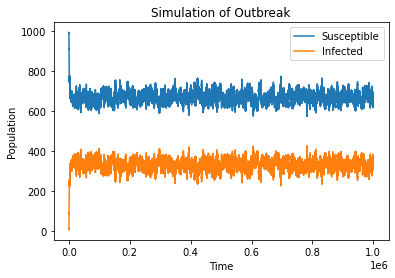

In [56]:
#plots simulation of outbreak
plt.title("Simulation of Outbreak")
plt.plot(S_list)
plt.plot(I_list)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(["Susceptible", "Infected"])
plt.show()

Running the simulation for a large number of times (1000000 times), the long term behaviour of the SIS model is that the number of people susceptible to the infection and the number of people infected with the infection comes to an equilibrium. The number of people susceptible to the infection stays somewhere around 600 to 750 out of the 1000 people in the population and the numberr of people who are infected with the infection varies in between 250 and 400. This gives us an average susceptibility of 666 out of 1000 people or 2/3 of the population, and an average number of people infected of 333 out of 1000 people or 1/3 of the population at any given time. 